<a href="https://colab.research.google.com/github/osnove/Dodatno/blob/master/oe1_Q_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primer uporabe Jupyer Python online Notebooka s pomočjo Googlovega servisa Colaboratory za izračune in izrise grafov. 

Pri uporabi te platforme ni potrebno imeti nameščenega Pythona.

(Poglej https://colab.research.google.com/notebooks/welcome.ipynb za osnovne informacije)

Uporaba Pythona za izrise je nekoliko bolj zapletena kot uporaba programov Matlab ali Octave, a se na daljši rok izplača.


S klikom na tekst se ga lahko editira, s Ctrl Enter se zažene eno celico, z Runtime/Run all pa se osveži celoten zvezek (notebook).

## Naboj v odvisnosti od časa in tok kot odvod naboja po času

Izrisali bomo naboj kot funkcijo časa

$Q(t) = 5\left( {1 - {e^{ - \frac{t}{{10{\rm{\: s}}}}}}} \right){\rm{mC}}$

ter tok kot odvod naboja po času

$i(t) =\frac{d Q}{dt}=0.5*{e^{-t/10 \: \rm s}} \: \rm mA $






## Najprej izris toka

In [0]:
%matplotlib inline # potreben ukaz, da se slike izrišejo v notebooku

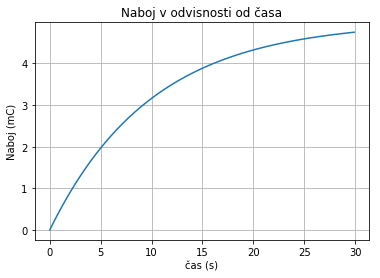

In [0]:
# vnos potrebnih knjižnic, matplotlib za grafe in numpy za matematične operacije
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# kreiranje časovnega niza od 0 do 30 s korakom 0.1
t = np.arange(0.0, 30.0, 0.1)
# Izračun naboja
Q = 5*(1-np.exp(-t/10))

# Priprava slike
fig, ax = plt.subplots()
ax.plot(t, Q)

ax.set(xlabel='čas (s)', ylabel='Naboj (mC)', # Označitev osi
       title='Naboj v odvisnosti od časa')
ax.grid()
plt.show()

## Dodamo izris toka



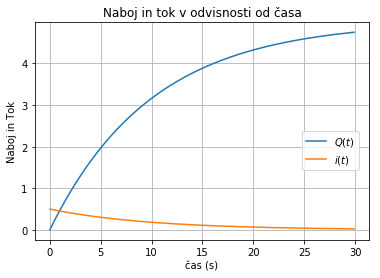

In [0]:
# vnos knjižnic in izračun naboja smo opravili že v prejšnji celici
# dodamo še izračun toka
i=0.5*np.exp(-t/10)
# Priprava slike
fig, ax = plt.subplots()
ax.plot(t, Q, label="$Q(t)$") # oznake so lahko LaTex oblike
ax.plot(t, i, label="$i(t$)")
# pozicioniranje legende
ax.legend(bbox_to_anchor=(0.8,.5), loc='upper left',  borderaxespad=0.)

ax.set(xlabel='čas (s)', ylabel='Naboj in Tok',
       title='Naboj in tok v odvisnosti od časa')
ax.grid()
plt.show()


## Izris dveh krivulj na ločenih oseh

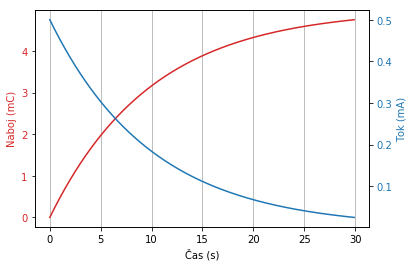

In [0]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Čas (s)')
ax1.set_ylabel('Naboj (mC)', color=color)
ax1.plot(t, Q, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='x')
ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota

color = 'tab:blue'
ax2.set_ylabel('Tok (mA)', color=color)  
ax2.plot(t, i, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.show()

## Izris obeh funkcij v ločenih grafih
Dodamo še eno x os z manj točkami, ki omogoča izris krivulje in simbolov na krivulji. (Če bi izrisali simbole na originalni x osi, bi se prekrivali in bi delovalo kot ena debela črta. Če pa bi izrisali funkcijo le v malo točkah, ne bi delovala dovolj zvezno.)

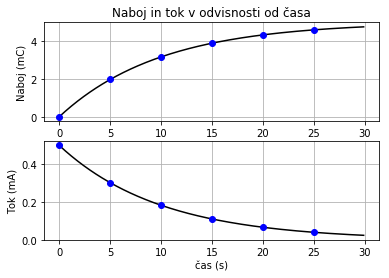

In [0]:
t1 = np.arange(0.0, 30.0, 5)
# Izračun naboja in toka v manj točkah
Q1= 5*(1-np.exp(-t1/10))
i1= 0.5*np.exp(-t1/10)

plt.figure()
plt.subplot(211)
plt.plot(t, Q, 'k', t1, Q1, 'bo')
plt.ylabel('Naboj (mC)')
plt.title('Naboj in tok v odvisnosti od časa')
plt.grid()

plt.subplot(212)
plt.plot(t, i, 'k', t1, i1, 'bo')
plt.ylabel('Tok (mA)')
plt.xlabel('čas (s)')

plt.grid()
plt.show()

Za osnovno delo z grafi si poglej spletno stran
https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

(kodo lahko spreminjate v tem zvezku (notebooku) ali pa kreirate novega z File/New Python 3 Notebook in preizkušate različne variante izrisov)

Primeri iz Codelaba: https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=WALI8x49GUpe

## Uporaba knjižnice Bokeh
Omogoča zoom, pan, shranjevanje slike, itd.

In [0]:
from bokeh.io import output_file, show
from bokeh.layouts import column
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()


# create a new plot
s1 = figure(plot_width=500, plot_height=500, title=None)
s1.circle(t, Q, color="navy", alpha=0.1)

# create another one
s2 = figure(plot_width=500, plot_height=500, title=None)
s2.triangle(t1, i1, size=10, color="firebrick", alpha=0.5)

# put the results in a column and show
show(column(s1, s2))

## Bokeh widget